In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

Text(0.5, 1.0, 'Ires Data')

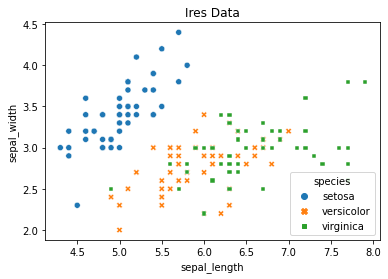

In [4]:
color = {'setosa' : 'r' , 'versicolor' : 'g' , 'virginica' : 'b'}


sns.scatterplot(data = df, x ='sepal_length' , y = 'sepal_width' , hue = 'species' , style = 'species')
plt.title('Ires Data')

In [5]:
df['species'].map(color)

0      r
1      r
2      r
3      r
4      r
      ..
145    b
146    b
147    b
148    b
149    b
Name: species, Length: 150, dtype: object

In [76]:
sns.set_theme(style="darkgrid")
iris = sns.load_dataset("iris")

<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

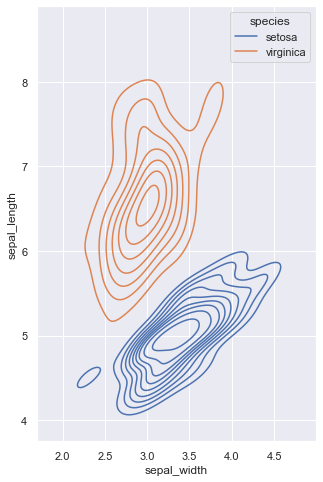

In [89]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw a contour plot to represent each bivariate density
sns.kdeplot(
    data=df.query("species != 'versicolor'"),
    x="sepal_width",
    y="sepal_length",
    hue="species",
    thresh=.1,
)

In [13]:
%pwd

'C:\\Users\\Josef Weldemariam'

In [69]:
X=df.drop(columns=['species'])
X
y=df[['species']]
y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify=y)


In [71]:
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)


DecisionTreeClassifier()

In [17]:
y_pred = dtc.predict(X_test)
y_train_predict = dtc.predict(X_train)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred , labels=['setosa', 'versicolor' , 'virginica'])

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

In [24]:
confusion_matrix(y_train,y_train_predict , labels=['setosa', 'versicolor' , 'virginica'])

array([[40,  0,  0],
       [ 0, 40,  0],
       [ 0,  0, 40]], dtype=int64)

In [62]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
y_pred_rf = clf.predict(X_test)

In [64]:
confusion_matrix(y_test,y_pred_rf , labels=['setosa', 'versicolor' , 'virginica'])

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

In [65]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [66]:
y_pred_lr = clf_lr.predict(X_test)

In [68]:
confusion_matrix(y_pred,y_pred_lr , labels=['setosa', 'versicolor' , 'virginica'])

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]], dtype=int64)